In [1]:
!nvidia-smi

Sun Jul  2 07:01:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%ls

drive/  sample_data/


In [3]:
%ls /

bin@      dev/   lib32@   mnt/                      python-apt/  srv/    usr/
boot/     etc/   lib64@   NGC-DL-CONTAINER-LICENSE  root/        sys/    var/
content/  home/  libx32@  opt/                      run/         tmp/
datalab/  lib@   media/   proc/                     sbin@        tools/


In [4]:
%cd /content

/content


In [5]:
!git clone https://github.com/ultralytics/yolov5
%cd yolo5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Total 16008 (delta 0), reused 0 (delta 0), pack-reused 16008
Receiving objects: 100% (16008/16008), 14.56 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (11011/11011), done.
[Errno 2] No such file or directory: 'yolo5'
/content
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [6]:
%ls

drive/  sample_data/  yolov5/


In [7]:
%cd yolov5

/content/yolov5


In [8]:
%ls

benchmarks.py    data/       LICENSE          requirements.txt  tutorial.ipynb
CITATION.cff     detect.py   models/          segment/          utils/
classify/        export.py   README.md        setup.cfg         val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py


In [9]:
%pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [10]:
import torch

In [11]:
!ls data/images

bus.jpg  zidane.jpg


In [12]:
from google.colab.patches import cv2_imshow
import cv2

Image = cv2.imread(filename='data/images/bus.jpg')
cv2_imshow(Image)

Output hidden; open in https://colab.research.google.com to view.

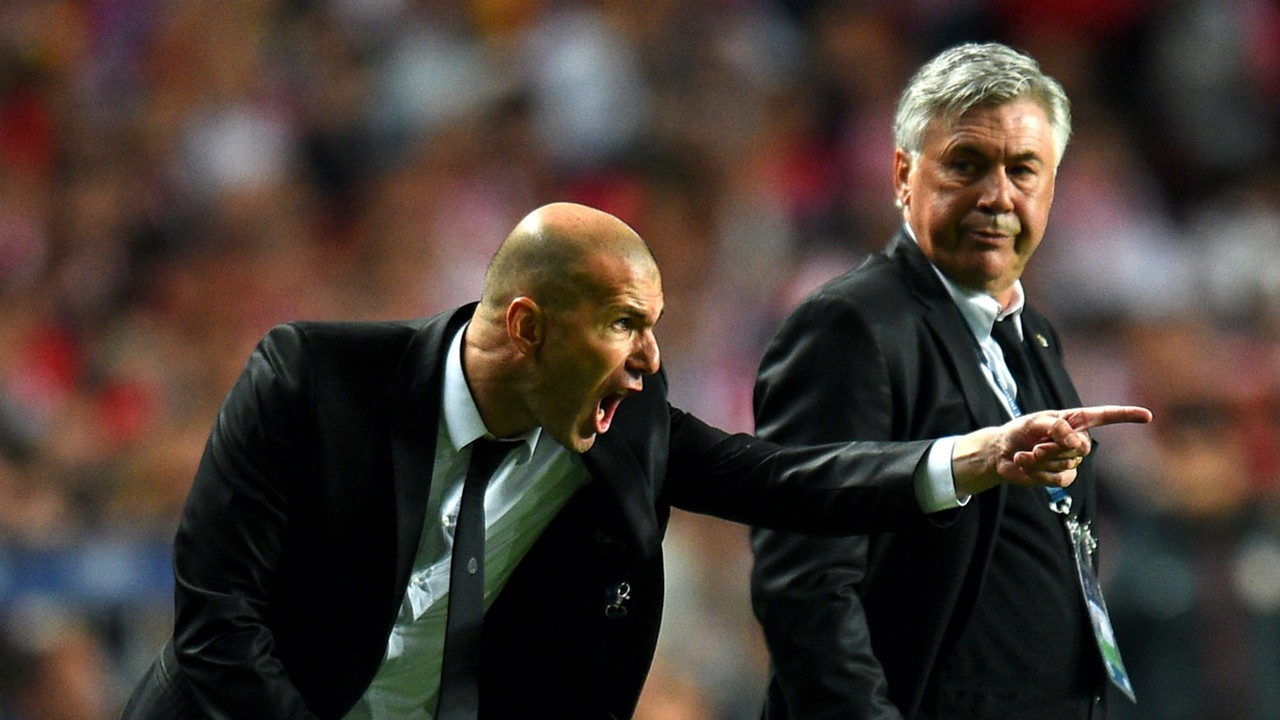

In [13]:
Image2 = cv2.imread(filename='data/images/zidane.jpg')
cv2_imshow(Image2)

In [15]:
!python detect.py --weight yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 53.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 42.3ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 44.7ms
Speed: 0.5ms pre-process, 43.5ms inference, 13.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [17]:
result_img = cv2.imread(filename='runs/detect/exp2/bus.jpg')
cv2_imshow(result_img)

Output hidden; open in https://colab.research.google.com to view.

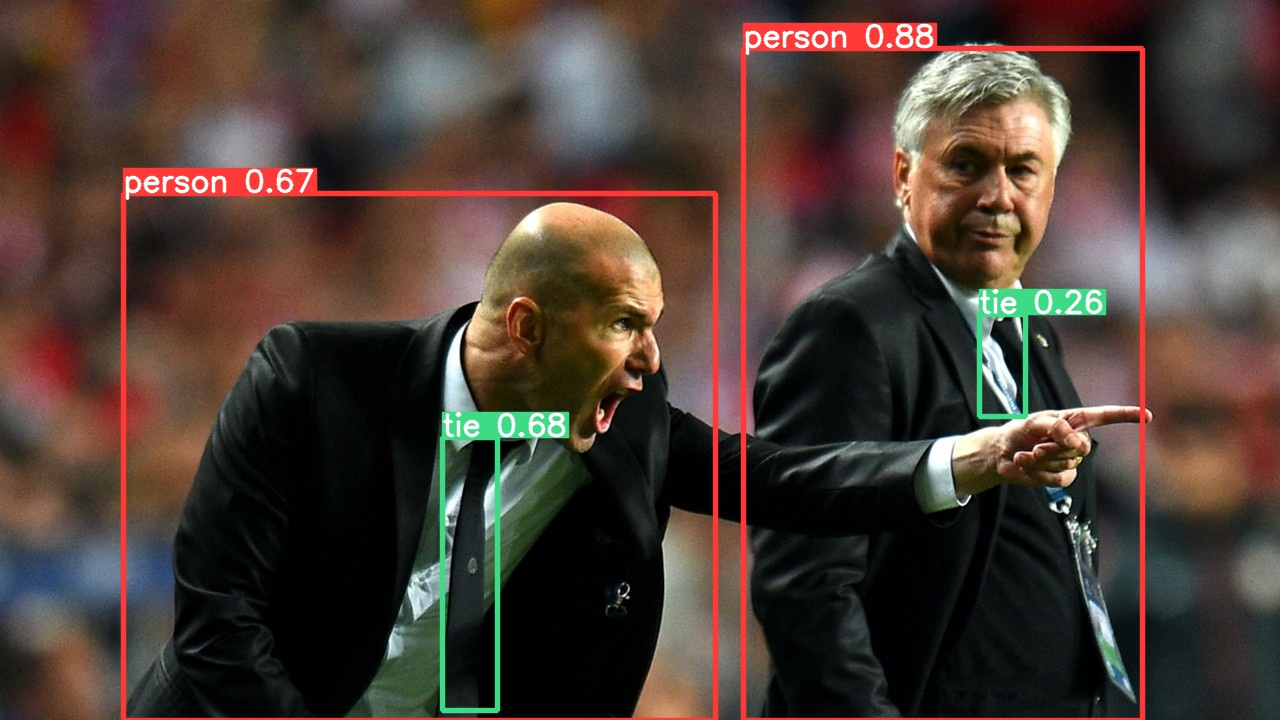

In [18]:
result_img2 = cv2.imread('runs/detect/exp2/zidane.jpg')
cv2_imshow(result_img2)

In [21]:
!python train.py --data data.yaml --weights yolov5s.pt --epochs 100 --batch-size 16

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

In [22]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --source '/content/drive/MyDrive/datas/test/test_dog.jpg'

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/datas/test/test_dog.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/datas/test/test_dog.jpg: 640x448 2 dogs, 42.2ms
Speed: 0.5ms pre-process, 42.2ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


In [23]:
!python detect.py --weights yolov5s.pt --source '/content/drive/MyDrive/datas/test/test_dog.jpg'

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/datas/test/test_dog.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/datas/test/test_dog.jpg: 640x448 1 cat, 1 dog, 43.2ms
Speed: 0.5ms pre-process, 43.2ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5
